In [1]:
# LSTMÎ∂ÑÎ•òÍ∏∞, YOLO ÏÇ¨ÏßÑÍ∞ùÏ≤¥ Ï∂îÏ∂ú

In [3]:
# Ïä§Ìå∏Î©îÏùº Î∂ÑÎ•òÍ∏∞
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# ÏûêÎ£åÎäî Ïó¨Í∏∞ÏÑú Î∞õÍ≥† ÏãúÏûëÌïòÏûê

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer         # Î®ºÏ†Ä ÌÜ†ÌÅ∞ÏúºÎ°ú ÎÇòÎàÑÎäî Í≤ÉÏù¥ Ïö∞ÏÑ†Ïù¥Îã§. 
from tensorflow.keras.preprocessing.sequence import pad_sequences 

In [94]:
data = pd.read_csv('spam.csv', encoding='latin1')                 # Ïã†Í∏∞ÌïòÍ≤åÎèÑ ÎùºÌã¥1ÏúºÎ°ú Ïù∏ÏΩîÎî©ÌïòÎ©¥ Íπ®ÏßÄÏßÄ ÏïäÎäîÎã§. 

In [95]:
data#Í∏∏Ïù¥Îäî 5572Í∏∏Ïù¥Í≥† Ïù¥Î¶ÑÏóÜÎäîÍ±∞ 3Ïó¥ÏùÄ ÌïÑÏöîÏóÜÏñ¥Î≥¥Ïù∏Îã§. 

v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will √å_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  
2           NaN        NaN  
3           NaN        NaN  
4           NaN        NaN  
...         ...        ...  
5567        NaN        NaN  
5568        NaN        NaN  
5569        NaN        NaN  
5570        NaN        NaN  
5571        NaN        NaN  

[5572 rows x 5 columns]

In [96]:
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [97]:
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])  # ÌäπÏ†ïÏó¥Ïùò Í∞íÏùÑ Ïû¨Ï†ïÎ†¨ÌïòÎäî Í≤ÉÏù¥Îã§. 

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   int64 
 1   v2      5572 non-null   object
dtypes: int64(1), object(1)
memory usage: 87.2+ KB


In [99]:
print('v2Ïó¥Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í :',data['v2'].nunique())
# ÏÉùÍ∞ÅÎ≥¥Îã§ Ï§ëÎ≥µÏù¥ Ï°¥Ïû¨ÌïúÎã§.
# Ï§ëÎ≥µÏù¥ ÏûàÏùÑ ÎïåÏóêÎäî 

v2Ïó¥Ïùò Ïú†ÎãàÌÅ¨Ìïú Í∞í : 5169


In [100]:
data.drop_duplicates(subset=['v2'], inplace=True) # Ï§ëÎ≥µÏ†úÍ±∞Î•º Îî∞Î°ú Ìï¥Î≥¥Ïûê.

In [101]:
data.groupby('v1').count() # Ïä§Ìå∏Î©îÏùºÏùÄ 653Í±¥Ïù¥ Ï°¥Ïû¨ÌïúÎã§. 
# smoteÍ∏∞Î≤ïÏúºÎ°ú ÎπÑÏú®ÏùÑ Ïú†ÏßÄÌïòÎäî Í≤ÉÎèÑ Í∞ÄÎä•Ìï† Í≤ÉÏù¥Îã§.

v2
v1      
0   4516
1    653

In [102]:
X_data = data['v2'] # Ïù¥Í≤ÉÏù¥ Î¨∏Ï†úÏßÄÏùº Í≤ÉÏù¥Îã§.
y_data = data['v1'] # Ïù¥Í≤ÉÏù¥ Ï†ïÎãµÏùº Í≤ÉÏù¥Îã§. 

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data) # stratifyÎäî ÎèôÏùºÌïú ÎπÑÏú®Î°ú Ï∏µÌôîÏ∂îÏ∂úÌïòÏó¨ ÎÇòÎàåÎïå ÏÇ¨Ïö©ÌïúÎã§. 

C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\user\anaconda3\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [104]:
# Î®ºÏ†Ä Ïà´ÏûêÎ°ú ÌÜ†ÌÅ∞ÌôîÎ•º ÏãúÏºúÏïºÌï† ÌïÑÏöîÏÑ±Ïù¥ ÎäêÍª¥ÏßÑÎã§. 
tokenizer = Tokenizer()
# ÏΩîÌçºÏä§Ïóê ÏûàÎäî ÌÖçÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Î°úÎ∂ÄÌÑ∞ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÎ•º ÏÉùÏÑ±Ìï¥ÏïºÌïúÎã§. 

In [105]:
tokenizer.fit_on_texts(X_train)


In [106]:
tokenizer.index_word # Ïù∏Îç±Ïä§ ÏõåÎìúÎäî Í∞Å Îã®Ïñ¥Ïóê Î∂ÄÏó¨Îêú Î≤àÌò∏Î•º ÌôïÏù∏Ìï† Ïàò ÏûàÎäî Í∏∞Îä•Ïù¥Îã§. 

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [107]:
tokenizer.word_counts # Îã®Ïñ¥ Ï∂úÌòÑ ÎπàÎèÑÏàòÏù¥Îã§. 
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer 
# ÌÖêÏÑúÌîåÎ°ú ÏºÄÎùºÏä§ ÌÜ†ÌÅ¨ÎÇòÏù¥Ï†ÄÏù¥Îã§.

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [108]:
len(tokenizer.index_word)     # Í∞ØÏàòÎäî 7800Í∞ú Í∞ÄÎüâÏù¥Îã§. 
# ÎßåÏïΩ Í∞ØÏàòÎ•º ÏßÄÏ†ïÌï¥ÏÑú Ï†ÄÏû•ÌïòÍ≥† Ïã∂Îã§Î©¥?

7821

In [109]:
X_train_encoded = tokenizer.texts_to_sequences(X_train) # Î¨∏Ïû•Ïù¥ Í∞Å Îã®Ïñ¥Ïùò Ïù∏Îç±Ïä§Î°ú Î≥ÄÌôòÎêú Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§. 
X_train_encoded # Ïà´Ïûê(Ï†ïÏàò)Î°ú Ïù∏ÏΩîÎî© ÎêòÏñ¥ÏûàÎã§.  

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [110]:
word_to_index = tokenizer.word_index

In [111]:
word_to_index  # ÏõåÎìú Ïù∏Îç±Ïä§ÏôÄ Ïù∏Îç±Ïä§ ÏõåÎìúÎäî Îã§Î•¥Îã§. 
# Ïó¨Í∏∞ÏÑú Ïù∏Îç±Ïä§ ÏàúÏÑúÎäî Í∞ÄÏû• ÎßéÏù¥ Îì±Ïû•Ìïú ÎπàÎèÑÏàòÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÌïúÎã§. 

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [112]:
tokenizer.word_counts.items() # ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ Í≤ΩÏö∞ÎèÑ ÎßéÏù¥ ÏûàÎã§. 
# ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ Í≤ΩÏö∞Îäî Ï†úÍ±∞ÌïòÎäî Í≤ÉÎèÑ ÌïÑÏöîÌï† ÎìØ ÌïòÎã§. 

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [113]:
total_cnt = len(word_to_index)
total_cnt

7821

In [114]:
threshold = 2

In [115]:
rare_cnt = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Í∞úÏàòÎ•º Ïπ¥Ïö¥Ìä∏
total_freq = 0 # ÌõàÎ†® Îç∞Ïù¥ÌÑ∞Ïùò Ï†ÑÏ≤¥ Îã®Ïñ¥ ÎπàÎèÑÏàò Ï¥ù Ìï©
rare_freq = 0 # Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä thresholdÎ≥¥Îã§ ÏûëÏùÄ Îã®Ïñ¥Ïùò Îì±Ïû• ÎπàÎèÑÏàòÏùò Ï¥ù Ìï©

In [116]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value                # ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Í∞Ä ÎàÑÏ†ÅÎêòÏóàÎã§. 
    if(value < threshold):                         # ÎßåÏïΩ Îì±Ïû•ÎπàÎèÑÏàòÍ∞Ä 2Î≥¥Îã§ ÏûëÏúºÎ©¥?
        rare_cnt = rare_cnt + 1                    # Î†àÏñ¥Ïπ¥Ïö¥Ìä∏Î•º ÎäòÎ¶∞Îã§. 
        rare_freq = rare_freq + value              # Î†àÏñ¥Í∞íÏóê Í∞íÏùÑ Ï∂îÍ∞ÄÌïúÎã§.

In [117]:
total_freq

65145

In [118]:
rare_cnt                                           # ÎπàÎèÑÏàòÍ∞Ä 4300Ïó¨Í∞úÏù¥Îã§. Ìù¨Í∑ÄÎã®Ïñ¥Ïù¥Îã§. 

4337

In [119]:
rare_freq                                          # Ìù¨Í∑ÄÎã®Ïñ¥Ïùò ÎπÑÏ§ëÏùÑ Î¥êÏïºÌï† Í≤ÉÏù¥Îã§. 

4337

In [120]:
(rare_cnt/total_cnt)*100                           # Ï†ÑÏ≤¥Îã®Ïñ¥Ï§ëÏóêÏÑú Îì±Ïû• ÎπàÎèÑÏàòÍ∞Ä 1Ïù∏ Îã®Ïñ¥Ïùò ÎπÑÏú®

55.45326684567191

In [121]:
(rare_freq/total_freq)*100                         # Îì±Ïû•ÎπàÎèÑÏàòÍ∞Ä 1Ïù∏ Îã®Ïñ¥ Îì±Ïû•ÎπÑÏú® 
# Îì±Ïû•ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ Îã®Ïñ¥Îäî Ï†úÍ±∞Ìï¥ÏïºÌï† ÏàòÎèÑ ÏûàÎã§. 

6.65745644331875

In [122]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1) 
tokenizer_over2 

In [123]:
tokenizer_over2.fit_on_texts(X_train)

In [124]:
len(tokenizer_over2.index_word)

7821

In [125]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [126]:
print('Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : %d' % max(len(sample) for sample in X_train_encoded))
# ÏµúÎåÄ Í∏∏Ïù¥Îäî ÏÉòÌîåÏóê Îã¥ÏïÑÏÑú ÏµúÎåÄÍ∏∏Ïù¥Î•º ÌôïÏù∏ÌïúÎã§. 

Î©îÏùºÏùò ÏµúÎåÄ Í∏∏Ïù¥ : 189


In [127]:
print('Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))
# Î©îÏùºÏùò ÌèâÍ∑†Í∏∏Ïù¥Îäî mapÌï®ÏàòÎ•º Ï†ÅÏö©Ìï¥ÏÑú Î™®Îì† Î¶¨Ïä§Ìä∏Ïóê ÎåÄÌï¥ÏÑú len Ìï®ÏàòÎ•º Ï†ÅÏö©Ìï¥ÏÑú Î™®Îëê Ìï©Ìïú Í≤ÉÏù¥Îã§. 
#

Î©îÏùºÏùò ÌèâÍ∑† Í∏∏Ïù¥ : 15.754534


(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

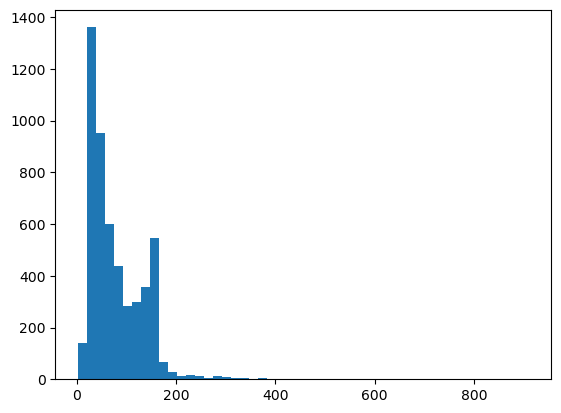

In [128]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [129]:
# Ïù¥Ï†ú RNNÏùÑ ÏÇ¨Ïö©Ìï† Í≤ÉÏù¥Îã§. Í∏∏Ïù¥Î•º ÎèôÏùºÌïòÍ≤å ÎßûÏ∂∞Ï§òÏïº ÌïúÎã§. 
X_train_padded = pad_sequences(X_train_encoded, maxlen = 189) # Î™®Îì† Î©îÏùºÏùò Í∏∏Ïù¥Î•º 189Î°ú Ï†ïÎ†¨Ìï¥ÏïºÌïúÎã§. 
X_train_padded.shape

(4135, 189)

In [130]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [131]:
vocab_size = len(word_to_index)+1 # Ìå®Îî© ÌÜ†ÌÅ∞Ïóê 0Î≤àÏùÑ ÏÇ¨Ïö©Ìï¥Ïïº ÌïúÎã§. Í∑∏ÎûòÏÑú 1ÏùÑ ÎçîÌïúÎã§. 

In [132]:
model = Sequential()                           # Î™®Îç∏ Ï†úÏûë
model.add(Embedding(vocab_size, embedding_dim))# vocab_sizeÏùò Ï∞®ÏõêÏùÑ 32Ï∞®ÏõêÏúºÎ°ú Ï§ÑÏù∏Îã§.
model.add(SimpleRNN(hidden_units))             # rnnÏÖÄÏùÄ 32Ï∞®ÏõêÏúºÎ°ú Ï∂úÎ†•ÌïúÎã§Îäî Í≤ÉÏù¥Îã§. 
model.add(Dense(1,activation='sigmoid'))       # Í≤∞Í≥ºÎäî Ïä§Ìå∏Ïó¨Î∂ÄÎ•º Íµ¨Î∂ÑÌïòÎäî Í≤ÉÏù¥Îã§. 


In [133]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/100
52/52 [==============================] - 2s 23ms/step - loss: 0.4713 - acc: 0.8014 - val_loss: 0.2737 - val_acc: 0.9565
Epoch 2/100
52/52 [==============================] - 1s 20ms/step - loss: 0.1643 - acc: 0.9613 - val_loss: 0.1030 - val_acc: 0.9746
Epoch 3/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0724 - acc: 0.9831 - val_loss: 0.0832 - val_acc: 0.9770
Epoch 4/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0497 - acc: 0.9861 - val_loss: 0.0721 - val_acc: 0.9782
Epoch 5/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0295 - acc: 0.9930 - val_loss: 0.0670 - val_acc: 0.9794
Epoch 6/100
52/52 [==============================] - 1s 20ms/step - loss: 0.1799 - acc: 0.9232 - val_loss: 0.1688 - val_acc: 0.9407
Epoch 7/100
52/52 [==============================] - 1s 20ms/step - loss: 0.0591 - acc: 0.9834 - val_loss: 0.0779 - val_acc: 0.9807
Epoch 8/100
52/52 [==============================] - 1s 20ms/step - loss: 0.

KeyboardInterrupt: 

In [134]:
tokenizer.texts_to_sequences(X_test)
# ÌÖåÏä§Ìä∏ÏÖãÎèÑ ÎòëÍ∞ôÏùÄ ÏûëÏóÖÏùÑ Ìï¥ÏïºÌïúÎã§. 

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [135]:
X_test_encoded = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen = 189)

In [136]:
model.predict(X_test_padded) # ÏãúÍ∑∏Î™®Ïù¥Îìú ÌòïÏãùÏúºÎ°ú Ï∂úÎ†•Ïù¥ Îêú Í≤ÉÏù¥Îã§. 

33/33 [==============================] - 0s 5ms/step


array([[4.041308e-03],
       [1.291933e-03],
       [9.958408e-01],
       ...,
       [5.277201e-04],
       [9.995058e-01],
       [9.827369e-03]], dtype=float32)

In [137]:
print("\n ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.1105 - acc: 0.9671

 ÌÖåÏä§Ìä∏ Ï†ïÌôïÎèÑ: 0.9671


In [140]:
# ÌåÄÏõêÎ≥Ñ Î©îÏùº Ï†úÎ™© / Î∂ÑÎ•òÍ≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±
# - Ïä§Ìå∏Î©îÏùº Î∂ÑÎ•òÍ∏∞
# - Î©îÏùº Î∂ÑÎ•òÍ∏∞ Î¨∏Ï†úÎäî Ïã§Ïö©Ï†ÅÏù¥ÏßÄÎèÑ ÏïäÎã§. 
# Î∂ÑÎ•òÍ∏∞Îäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Î∞©ÏãùÏúºÎ°ú ÏßÑÌñâÌïúÎã§.
# ÌÜ†ÌÅ∞Ìôî - ÏàòÏπòÎ≥ÄÌôò - Ìå®Îî© - Î™®Îç∏ÏûÖÎ†• - Í≤∞Í≥º
# Í∞êÏÑ±Î∂ÑÎ•ò Î∂ÑÏÑùÍ∏∞Î•º ÎßåÎìúÎäî Ïó∞ÏäµÏùÑ Ìï¥Î≥¥Ïûê. 
# 2000ÎÖÑÎåÄ Ï¥àÎ∞òÍπåÏßÄÎßå Ìï¥ÎèÑ ÏΩîÎî©Í∏∞Ïà†Ïù¥ ÏóÜÎçò ÏãúÏ†à ÎåìÍ∏ÄÏùÑ ÏùºÏùºÏù¥ Î≥µÏÇ¨Ìï¥ÏÑú Î∂ôÏó¨ÎÑ£ÏóàÎã§.
# Í∞êÏÑ±Îã®Í≥ÑÎèÑ Ïà´ÏûêÎ°ú Î∂ÑÎ•òÌï¥ÏÑú  Î∂ôÏòÄÎã§. Í≥µÎ∂ÄÎ•º ÏïàÌïòÎ©¥ Î™∏Ïù¥ Í≥†ÏÉùÌïúÎã§. 
# ÏßÅÏ†ë Î™®Îç∏Ïóê ÎåÄÌï¥ Ï†ïÏÑ±Ï†Å ÌèâÍ∞ÄÎ•º ÌïòÍ≥†Ïûê ÌïúÎã§Î©¥?(Ï†ïÎüâÏ†Å ÌèâÍ∞Ä-Ï†ïÌôïÎèÑ ÌèâÍ∞Ä-Í∞Ä ÏïÑÎãå)
# Ïù∏Í≥µÏßÄÎä• Î∂ÑÏïºÏ§ëÏóê XAI(explainable AI)Í∞Ä ÏûàÎã§. ÏÑ§Î™Ö Í∞ÄÎä•Ìïú AIÏù¥Îã§. 
# AIÍ∞Ä Í≤∞Î°†ÏùÑ ÎÇ¥Î¶∞ Í∑ºÍ±∞Î•º ÏïåÏïÑÏïº ÌïúÎã§. 
# Î≠ò ÌïòÎì†ÏßÄ ÏµúÏ¢ÖÎ™©ÌëúÎäî ÏûêÎèôÌôîÏù¥Îã§. Ïö∞Î¶¨Í∞Ä ÏÜêÏùÑ ÎåÄÏßÄ ÏïäÏïÑÎèÑ Ïú†ÏßÄÎ≥¥ÏàòÍ∞Ä ÏûêÎèôÏúºÎ°ú ÎêòÎäî Í≤ÉÏùÑ ÏõêÌïúÎã§. 
# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë - Ï†ÑÏ≤òÎ¶¨ - Î∂ÑÏÑù - ÏãúÍ∞ÅÌôî - Î™®Îç∏ÎßÅ - ÏòàÏ∏°Í≤∞Í≥ºÌôïÏù∏ - Ïú†ÏßÄÎ≥¥Ïàò - Î∞∞Ìè¨ - ÏÑ±Îä•Í∞úÏÑ†.. 
# Ïù¥ Ï†ÑÏ≤¥Í∞Ä ÏûêÎèôÌôîÎêòÎäî Í≤ÉÏù¥ ÏµúÏ¢Ö Î™©ÌëúÏù∏ Í≤ÉÏù¥Îã§. 
# Ïã§ÏãúÍ∞ÑÏúºÎ°ú Ï†ÑÏÜ°ÎêòÎäî Ïù¥Î©îÏùºÏùÄ Î©îÏùº Î∂ÑÎ•òÍ∏∞Í∞Ä ÏïåÏïÑÏÑú Ï≤òÎ¶¨Ï§ëÏù¥Îã§. 
# Ïó¨Í∏∞ÏÑú Îç∞Ïù¥ÌÑ∞Î≤†Ïù¥Ïä§ ÏòÅÏó≠ÏúºÎ°ú ÎÑòÏñ¥Í∞ÑÎã§. ÌÖåÏù¥Î∏îÏóêÏÑú ÏßÑÌñâÎê† Í≤ÉÏù¥Îã§. 
# 1. ÌïòÎ£®Îã®ÏúÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏßëÌïúÎã§Í≥† ÌïòÏûê. Ïä§ÌÅ¨ÎûòÌïë Í∏∞Í≥ÑÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏïåÏïÑÏÑú Î™®ÏúºÍ≤å Ìï† Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. 
# 2. Ïù¥ ÌÖçÏä§Ìä∏Î•º ÏûêÎèôÏúºÎ°ú Ï†ÑÏ≤òÎ¶¨ÌïòÎäî Í≥ºÏ†ïÏùÑ Íµ¨ÌòÑÌï¥ÏïºÌï† Í≤ÉÏù¥Îã§. 
# 3. Í∏∞Ï°¥ Î™®Îç∏Ïù¥ Ï°¥Ïû¨Ìï† Í≤ÉÏù¥Îã§. ÏÉàÎ°≠Í≤å ÏàòÏßëÎêú Îç∞Ïù¥ÌÑ∞Î•º Ï∂îÍ∞ÄÌïòÏó¨ ÌïôÏäµÏùÑ Ìï¥ÏïºÌïúÎã§. 
# Î™®Îç∏ÏùÑ ÏïÑÏòà ÏÉàÎ°ú ÎßåÎì§Í±∞ÎÇò Í∏∞Ï°¥ Î™®Îç∏ÏùÑ ÌååÏù∏ÌäúÎãùÏùÑ ÌïòÍ±∞ÎÇò. Îëò Ï§ë ÌïòÎÇòÏù¥Îã§. 
# ÏùºÎ∞òÏ†ÅÏúºÎ°ú Î™®Îç∏ÏùÑ ÌååÏù∏ÌäúÎãùÌïòÏó¨ Í∞úÏÑ†ÌïúÎã§. 
# ÏãúÍ∑∏Î™®Ïù¥ÎìúÎäî Î¨∏Ï†úÍ∞Ä Ï°¥Ïû¨ÌïúÎã§. 0.49Îäî 0ÏúºÎ°ú Î∂ÑÎ•òÎêòÍ≥† 0.5Îäî 1Î°ú Î∂ÑÎ•òÎêúÎã§. Îß§Ïö∞ ÎØ∏ÏÑ∏Ìïú Ï∞®Ïù¥Î°ú Î∂ÑÎ•òÎê† Ïàò ÏûàÎã§.
# Ïó¨Í∏∞ÏÑú Ïï†Îü¨Í∞Ä ÎßéÏù¥ Î∞úÏÉùÌïúÎã§. Ïó¨Í∏∞ÏÑú ÌãÄÎ¶¨Îäî Í≤ΩÏö∞Í∞Ä ÎßéÏù¥ ÎÇòÏò®Îã§. ÎïåÎ°úÎäî ÏãúÍ∑∏Î™®Ïù¥ÎìúÎ•º ÏßÅÏ†ë ÌôïÏù∏Ìï† ÌïÑÏöîÏÑ±Ïù¥ ÏûàÎã§.
# 0 ÏïÑÎãàÎ©¥ 1ÏóêÏÑú Ï∂úÎ†•ÏùÑ Ìï¥ÏïºÌïòÎäîÎç∞ 0.5Î•º Ï∂úÎ†•ÌñàÎã§Îäî Í≤ÉÏùÄ Î™®Î•¥Í≤†Îã§Îäî Ïù¥ÏïºÍ∏∞Ïù¥Îã§. 

In [214]:
# Ïò§ÎäòÏùÄ YOLOÎ•º Ìï† Í≤ÉÏù¥Îã§. 
from konlpy.tag import Okt

In [264]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 

In [216]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")
# ÎÑ§Ïù¥Î≤ÑÏáºÌïëÎ¶¨Î∑∞Ïù¥Îã§.

('ratings_total.txt', <http.client.HTTPMessage at 0x2b9eb45e6d0>)

In [308]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [309]:
total_data = total_data.head(10000) # 20ÎßåÍ∞úÏùò Î¶¨Î∑∞Í∞Ä ÏûàÎã§. 1ÎßåÍ±¥Îßå Ïì∞Ïûê

In [310]:
np.select([total_data.ratings>3],[1])                            # ÎÑòÌååÏù¥Ïóê ÏÖÄÎ†âÌä∏ÎùºÎäî Ìï®ÏàòÍ∞Ä Ï°¥Ïû¨ÌïúÎã§. 
# 3Î≥¥Îã§ ÌÅ∞ Í≤ΩÏö∞Îäî 1Î°ú Î≥ÄÌïòÍ≥† ÏïÑÎãàÎ©¥ 0Ïù¥ ÎêúÎã§. Ï°∞Í±¥Ïóê ÎßûÏúºÎ©¥ 1Ïù¥ ÎêúÎã§.

array([1, 0, 1, ..., 0, 0, 0])

In [311]:
x = np.arange(10)
np.select([x<3],[x**2])             # ÎÑòÌååÏù¥ ÏÖÄÎ†âÌä∏Îäî ÍΩ§ Ïû¨Î∞åÎäî Ìï®ÏàòÏù¥Îã§. 1,0ÏúºÎ°ú Î≥¥Ïùº Ïàò ÏûàÍ≥† ÎÇ¥Ïö©ÏùÑ Í≥±Ìï† ÏàòÎèÑ ÏûàÎã§. 

array([0, 1, 4, 0, 0, 0, 0, 0, 0, 0])

In [312]:
x = np.arange(10)
np.select([x<3],[x**2],default=999) # ÎîîÌè¥Ìä∏Îäî 0Ïù¥Îã§. Ïù¥Í±∏ 999Î°ú ÏàòÏ†ïÌïòÏòÄÎã§. 

array([  0,   1,   4, 999, 999, 999, 999, 999, 999, 999])

In [313]:
x = np.arange(10)
np.select([x<3,x>7],[x**2,x**3],default=999) # ÎîîÌè¥Ìä∏Îäî 0Ïù¥Îã§. Ïù¥Í±∏ 999Î°ú ÏàòÏ†ïÌïòÏòÄÎã§. 

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

In [314]:
total_data['lable']=np.select([total_data.ratings>3],[1],default= 0 )  # Ïù¥Í±∏ Ïù¥Ïö©Ìï¥Î≥º Í≤ÉÏù¥Îã§. 

In [315]:
total_data['ratings'].value_counts() # Ï§ëÍ∞ÑÏù¥ ÏóÜÎäî Ïã†Í∏∞Ìïú ÏûêÎ£åÏù¥Îã§. 

ratings
5    3995
2    3223
1    1799
4     983
Name: count, dtype: int64

In [316]:
total_data['reviews'].nunique()# Î¶¨Î∑∞Ïóê ÎåÄÌï¥ Î™á Í∞úÏùò Ï§ëÎ≥µÏù¥ Ï°¥Ïû¨ÌïòÍ∏¥ ÌïúÎã§. 

10000

In [317]:
total_data.drop_duplicates(subset=['reviews'],inplace=True)

In [318]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [319]:
train_data['lable'].value_counts()#Ïû¨Î∞åÍ≤åÎèÑ Î∞òÎ∞ò ÎÇòÎà†Ï°åÎã§. 
# ÌïúÍ∏ÄÌïòÍ≥† Í≥µÎ∞±ÏùÑ Ï†úÏô∏Ìïú Îã§Î•∏ Î¨∏ÏûêÎ•º Ï†úÍ±∞Ìï¥Î≥¥Ïûê.

lable
0    3753
1    3747
Name: count, dtype: int64

In [320]:
train_data['reviews']
# Î¨∏Ï†úÎäî Ïà´ÏûêÍ∞Ä Ï§ëÏöîÌï† ÏàòÎèÑ ÏûàÎã§. ÎßåÏïΩ ÌïÑÏöîÌïòÎã§Í≥† ÏÉùÍ∞ÅÎêúÎã§Î©¥ Ïà´ÏûêÎ•º Î¨∂Ïñ¥Î≤ÑÎ¶¥ ÏàòÎèÑ ÏûàÎã§. 
# ÎùÑÏñ¥Ïì∞Í∏∞ÎèÑ ÏïàÎêòÏñ¥ÏûàÎã§.
# ÎÑ§Ïù¥Î≤ÑÏóê ÎßûÏ∂§Î≤ï Í≤ÄÏÇ¨Í∏∞Í∞Ä ÏûàÎã§. Í∑∏ APIÎ•º Ïì∞Î©¥ ÍπîÎÅîÌïòÍ≤å ÎÇòÏò®Îã§. 
# „Öã„Öã, „Ö†„Ö†, „Ñ∑„Ñ∑ Ïù¥Í≤ÉÏùÄ Ïù¥Î™®Ìã∞ÏΩòÏùÑ Í∏ÄÏûêÎ°ú Ïì¥ Í≤ÉÏù¥Îã§. Í∏çÏ†ï, Î∂ÄÏ†ïÏùò Îúª Î™®ÎëêÍ∞Ä ÎêúÎã§. 
# Ïò§ÌÉÄÎèÑ ÎßéÍ≥† Î∂àÌé∏ÌïòÎã§. ÎßûÏ∂§Î≤ïÏùÑ Î∂àÌé∏Ìï¥ÌïòÎäî ÏÇ¨ÎûåÏù¥ ÏûàÏúºÎ©¥ Îß§Ïö∞ Î∂àÌé∏Ìï† Í≤ÉÏù¥Îã§. 
# ÏïûÏóêÎäî Í∏çÏ†ïÌïòÎã§Í∞Ä Îí§ÏóêÏÑú Î∂ÄÏ†ïÌï¥Î≤ÑÎ¶¨Í±∞ÎÇò Í∑∏ Î∞òÎåÄÏùò Í≤ΩÏö∞ÎèÑ ÎßéÏù¥ Ï°¥Ïû¨ÌïúÎã§. 
# ÏÑ∏Î∂ÄÏûëÏóÖÏù¥ ÎßéÏù¥ ÌïÑÏöîÌïòÎã§. ÍΩ§ Í≥®ÏπòÏïÑÌîÑÎã§. 
# Ï†ïÍ∑úÌëúÌòÑÏãùÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Ï†úÍ±∞Ìï¥Ïïº Ìï† Í≤ÉÏù¥Îã§. 
# 

4901                     ÎëêÍªòÍ∞Ä Ï¢Ä ÏñáÎÑ§Ïöî. Î¨ºÏùÑ ÎßéÏù¥ Ìù°Ïàò Ìï† Ïàò ÏûàÏùÑÍπå Ïã∂Ïñ¥Ïöî.
4375    ÏßÑÏßú Î≥ÑÎ°ú ÎßàÍ∞êÎèÑ Î≥ÑÎ°úÍ≥† Í∑úÍ≤©Ïù¥ ÎÑàÎ¨¥ Î≤åÏñ¥Ï†∏ÏÑú Í∑∏ÏÇ¨Ïù¥Î°ú ÎπóÎ¨ºÏïÑ Îã§Îì§Ïñ¥Í∞ê Îî± ÎßûÏßÄÎèÑ ...
6698                           Ïö∞Î¶¨ÏïÑÏù¥Í∞ÄÏõåÎÇôÏÜêÏùÑÎßàÎãàÏì∞ÎäîÌé∏Ïù¥ÎùºÍ∏àÎ∞©ÎúØÏñ¥Î≤ÑÎ¶¨ÎÑ§Ïöî „Ö†
9805    ÏõêÎûò Ïù¥Îü∞ Î™®ÏñëÏù∏Í∞ÄÏöî ? ÏïÑÎ¨¥Î¶¨Î¥êÎèÑ ÎçúÎ∞ïÏùÄÍ±∞ Í∞ôÍ±∞Îì†Ïöî...... Î∞îÎäêÏßàÌñàÎã§Í∞Ä ÎúØÏñ¥ÏßÑ...
1101                      Ïû¨Íµ¨Îß§ Îß§Ï£º Ï£ºÎßêÏà†ÏïàÏ£ºÏö©ÏúºÎ°ú Ï£ºÎ¨∏Ìï¥ÏÑú ÎßõÏûàÍ≤å Î®πÍ≥†ÏûàÏäµÎãàÎã§
                              ...                        
5734                      ÏÑúÎûçÏù¥ Ï†ïÎ¶¨Ïóê ÏßÑÏßúÏ¢ãÏïÑÏöî ÍπîÎÅîÌïúÍ≤å Ïó¥ÎïåÎßàÎã§ Í∏∞Î∂ÑÏù¥ Ï¢ãÏïÑÏöî
5191                                  Ïû¨Íµ¨Îß§ ÎÑ§Î≤àÏß∏ Ïû¨Íµ¨Îß§ ÏÉÅÌíàÏûÖÎãàÎã§~~
5390    Ìï∏ÎìúÌè∞ÏúºÎ°ú Ï£ºÎ¨∏ÌïòÎã§Î≥¥Îãà ÌïúÏûê ÏûÖÎ†•Ïù¥ Ïñ¥Î†§Ïö¥Îç∞ ÌïúÍ∏ÄÎ°ú Î¨∏Íµ¨Î•º Ï†ÅÏóàÏñ¥ÎèÑ 'ÏÇºÍ∞Ä Í≥†Ïù∏Ïùò ...
860                                   ÏÇ¨Ïù¥Ï¶àÎèÑ Ï†ïÏÇ

In [321]:
train_data['reviews'] = train_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
# Î¶¨Î∑∞Ïóê ÌÖçÏä§Ìä∏Í∞Ä ÏóÜÎäî Í≤ΩÏö∞ÎèÑ Ï°¥Ïû¨ÌïúÎã§. Îπà Î¨∏ÏûêÏó¥Î°úÎßå Ï†ÄÏû•ÎêòÏñ¥Ï†∏ ÏûàÎäî Í≤ΩÏö∞Í∞Ä Ï°¥Ïû¨ÌïúÎã§.
# ÎßåÏïΩ Îπà Î¨∏ÏûêÏó¥Î°ú Ï†ÄÏû•ÎêòÏñ¥Ï†∏ ÏûàÎäî Í≤ΩÏö∞ NanÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≥†Ïûê ÌïúÎã§Î©¥ replace Ìï®ÏàòÎ•º ÏÇ¨Ïö©Ìï† Ïàò ÏûàÎã§.

In [322]:
train_data['reviews'].replace("",np.nan,inplace=True)

In [323]:
train_data.isnull().sum() # Í≤∞Ï∏°Í∞íÏù¥ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎäî Í≤ÉÏùÑ ÌôïÏù∏ÌñàÎã§. 
# Ï§ëÎ≥µÏùÑ Ï†úÍ±∞ÌïòÎäî ÏûëÏóÖÏùÑ ÏàòÌñâÌï¥Ïïº ÌïúÎã§. 

ratings    0
reviews    0
lable      0
dtype: int64

In [324]:
test_data.drop_duplicates(subset=['reviews'], inplace=True)
test_data['reviews']=test_data['reviews'].str.replace("[^„Ñ±-„Öé„Öè-„Ö£Í∞Ä-Ìû£ ]","")
test_data['reviews'].replace("", np.nan, inplace=True)
# ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê ÎåÄÌï¥ÏÑúÎèÑ Í∞ôÏùÄ ÏûëÏóÖÏùÑ ÌïúÎã§. 

In [325]:
test_data = test_data.dropna(how='any') # Í∏∞Î≥∏Ï†ÅÏù∏ Ï†ÑÏ≤òÎ¶¨Î•º ÎÅùÎÉàÎã§.

In [326]:
test_data

ratings                                            reviews  lable
6252        5  „Öé„Öé Í∞ÄÍ≤©Ïóê ÎπÑÌï¥ Ï†ÄÎ†¥ÌïòÍ≥† Ï¢ãÎÑ§Ïöî„Öé„ÖéÎã§ÏùåÏóê Í∏∞ÌöåÍ∞Ä ÎêòÎ©¥ Îòê Íµ¨Ìï¥ ÌïòÍ≤üÏäµÎãàÎã§ Î≤àÏ∞ΩÌïòÏÑ∏...      1
4684        1                                         Î∞∞ÏÜ°Ïù¥ 15ÏùºÍ±∏Î¶∞ÎìØ      0
1731        5                             ÎÑàÎ¨¥ Ï¢ãÏïÑÏöî Í∑∏Î¶¨Í≥† Ï¢ãÏïÑÏöî Í∑∏Î¶¨Í≥† Ï¢ãÏïÑÏöî      1
4742        4                               Í≤ÄÎåïÏù¥Îäî Î¨ªÏñ¥ÎÇòÏßÄÎßå ÎÉÑÏÉàÎäî Îã§Îπ†Ï°åÏñ¥Ïöî      1
4521        2                      Î≥ÑÎ°úÏòàÏöî... „Öú„Öú ÎÑàÎ¨¥ ÏïΩÌï¥ÏÑú ÌïúÎ≤àÏì∞Í≥† Î≤ÑÎ†∏ÏäµÎãàÎã§.      0
...       ...                                                ...    ...
4862        1                                 ÌóàÎ¶¨Í∞Ä ÎßêÎèÑÏïàÎêòÍ≤åÏûëÏïÑÏÑú Î™ªÏûÖÍ≤†Ïñ¥Ïöî      0
7025        1  ÏÉÅÌíàÎ∞∞ÏÜ°Ìï†Îïå Ï†úÌíàÍ≤ÄÏàòÏ¢Ä ÌïòÍ≥† Î≥¥ÎÇ¥ÏÑ∏Ïöî ÏùòÏûê Î∞ú 4ÏÑºÏπòÎäî ÏòÆÌè≠ ÌååÏó¨ÏÑú ÏôîÎçòÎç∞ ÌôòÎ∂àÌï†Î†§...      0
7647        4                                     Ï¢Ä ÏñáÎã§Îäî Ï†êÏù¥ ÏïÑÏâΩÎÑ§Ïöî.      1
7161        4                   Ï¥âÏ¥âÌïòÍ≥† Í±¥Ï°∞ÌïòÏßÄ ÏïäÏäµÎãàÎã§. Ï†ÄÎ†¥ÌïòÍ≤å Íµ¨Îß§Ìï¥ÏÑú ÎßåÏ°±Ìï©ÎãàÎã§.      1
73          5             Ìï≠ÏÉÅ Ïï†Ïö©Ìï¥ÏÑú „Öã„Öã„ÖãÎ¶¨Î∑∞ÎÇ®Í∏∞Í∏∞ÎèÑÎ≠êÌïòÎÑ§Ïöî„Öã„ÖãÏù¥Í≤ÉÎßå Î®πÏñ¥Ïöî Î∞∞ÏÜ°ÎèÑ Îπ®ÎùºÏöî      1

[2500 rows x 3 columns]

In [327]:
from konlpy.tag import Okt   
okt = Okt()


In [328]:
okt.morphs('Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥ÎÑ§Ïöî Í∞ÄÍ≤©ÎåÄÎπÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏöî~~~ Ï≤®ÏóêÎäî ÌûòÎì§Ïñ¥ÌïòÎÇò Ï°∞Í∏à ÏßÄÎÇòÎãà Ïûò ÌïòÎÑ§Ïöî')

['Î∞∞ÏÜ°',
 'ÎèÑ',
 'Îπ†Î•¥ÎÑ§Ïöî',
 'Í∞ÄÍ≤©',
 'ÎåÄÎπÑ',
 'Ï¢ãÏùÄ',
 'Í≤É',
 'Í∞ôÏïÑÏöî',
 '~~~',
 'Ï≤®',
 'ÏóêÎäî',
 'ÌûòÎì§Ïñ¥ÌïòÎÇò',
 'Ï°∞Í∏à',
 'ÏßÄÎÇòÎãà',
 'Ïûò',
 'ÌïòÎÑ§Ïöî']

In [329]:
okt.pos('Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥ÎÑ§Ïöî Í∞ÄÍ≤©ÎåÄÎπÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏöî~~~ Ï≤®ÏóêÎäî ÌûòÎì§Ïñ¥ÌïòÎÇò Ï°∞Í∏à ÏßÄÎÇòÎãà Ïûò ÌïòÎÑ§Ïöî')
# ÎåÄÎ∂ÄÎ∂Ñ Ï°∞ÏÇ¨Îäî ÏùòÎØ∏Í∞Ä ÏóÜÎã§. ÏùºÎ∞òÏ†ÅÏúºÎ°úÎäî Î™ÖÏÇ¨,ÎèôÏÇ¨Îßå ÎÇ®Í∏∞Îäî Í≤ΩÏö∞Í∞Ä ÎßéÎã§. 
# https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit#gid=0 
# ÌòÑÏû¨Ïùò ÏÇ¨Ïù¥Ìä∏ÏóêÏÑú ÌôïÏù∏Ïù¥ Í∞ÄÎä•ÌïòÎã§. 

[('Î∞∞ÏÜ°', 'Noun'),
 ('ÎèÑ', 'Josa'),
 ('Îπ†Î•¥ÎÑ§Ïöî', 'Adjective'),
 ('Í∞ÄÍ≤©', 'Noun'),
 ('ÎåÄÎπÑ', 'Noun'),
 ('Ï¢ãÏùÄ', 'Adjective'),
 ('Í≤É', 'Noun'),
 ('Í∞ôÏïÑÏöî', 'Adjective'),
 ('~~~', 'Punctuation'),
 ('Ï≤®', 'Noun'),
 ('ÏóêÎäî', 'Josa'),
 ('ÌûòÎì§Ïñ¥ÌïòÎÇò', 'Adjective'),
 ('Ï°∞Í∏à', 'Noun'),
 ('ÏßÄÎÇòÎãà', 'Verb'),
 ('Ïûò', 'Verb'),
 ('ÌïòÎÑ§Ïöî', 'Verb')]

In [239]:
pree = okt.pos('Î∞∞ÏÜ°ÎèÑ Îπ†Î•¥ÎÑ§Ïöî Í∞ÄÍ≤©ÎåÄÎπÑ Ï¢ãÏùÄÍ≤É Í∞ôÏïÑÏöî~~~ Ï≤®ÏóêÎäî ÌûòÎì§Ïñ¥ÌïòÎÇò Ï°∞Í∏à ÏßÄÎÇòÎãà Ïûò ÌïòÎÑ§Ïöî')
len(pree)
NV = []
for i in range(len(pree)):
    if pree[i][1] == 'Noun' or pree[i][1] == 'Verb':
        NV.append(pree[i])
NV

[('Î∞∞ÏÜ°', 'Noun'),
 ('Í∞ÄÍ≤©', 'Noun'),
 ('ÎåÄÎπÑ', 'Noun'),
 ('Í≤É', 'Noun'),
 ('Ï≤®', 'Noun'),
 ('Ï°∞Í∏à', 'Noun'),
 ('ÏßÄÎÇòÎãà', 'Verb'),
 ('Ïûò', 'Verb'),
 ('ÌïòÎÑ§Ïöî', 'Verb')]

In [206]:
def MyangDong(dan):
    pree = okt.pos(dan)
    NV = []
    for i in range(len(pree)):
        if pree[i][1] == 'Noun' or pree[i][1] == 'Verb':
            NV.append(pree[i])
    return NV

In [210]:
NV = []
NV.append(test_data['reviews'].map(MyangDong))

KeyboardInterrupt: 

In [330]:
stopwords = ['ÎèÑ', 'Îäî', 'Îã§', 'Ïùò', 'Í∞Ä', 'Ïù¥', 'ÏùÄ', 'Ìïú', 'Ïóê', 'Ìïò', 'Í≥†', 'ÏùÑ', 'Î•º', 'Ïù∏', 'ÎìØ', 'Í≥º', 'ÏôÄ', 'ÎÑ§', 'Îì§', 'ÎìØ', 'ÏßÄ', 'ÏûÑ', 'Í≤å','.','..']

In [331]:
['tokenized']=train_data['reviews'].apply(okt.morphs)

In [332]:
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [333]:
from collections import Counter # ÎπàÎèÑÏàòÍ∞Ä ÎÇÆÏùÄ ÏàòÎ•º Ï∞æÍ∏∞ ÏúÑÌï¥ Ïπ¥Ïö¥ÌÑ∞ Ìï®ÏàòÎ•º Ïì∞Ïûê

In [334]:
listy = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [335]:
Counter(listy)                                   #Î¶¨Ïä§Ìä∏Î•º Ï∂îÍ∞ÄÌïòÎ©¥ Îã®Ïñ¥Ïùò ÎπàÎèÑÏàòÎ•º ÌôïÏù¥ÎÇ¥Ï§ÄÎã§. 

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [336]:
negative_words = train_data[train_data.lable == 0].values        # Î∞∏Î•òÏ¶àÎäî ÌòÑÏû¨Ïùò Í∞íÏùÑ Î∞∞Ïó¥Î°ú ÎÇòÌÉÄÎÇ∏Îã§. 

In [337]:
positive_words = train_data[train_data.lable == 1].values       # Í∏çÏ†ï ÎπÑÏú®Ïù¥Îã§.

In [338]:
negative_words = np.hstack(train_data[train_data.lable==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.lable==1]['tokenized'].values)

In [339]:
Counter(negative_words)       

Counter({'..': 750,
         'Ïïà': 620,
         'ÎÑàÎ¨¥': 589,
         'Ïöî': 588,
         '...': 500,
         'Î∞∞ÏÜ°': 449,
         'Í∑∏ÎÉ•': 435,
         'Ïûò': 429,
         'ÌñàÎäîÎç∞': 294,
         'Íµ¨Îß§': 287,
         'Î°ú': 286,
         'Ï†úÌíà': 283,
         'Î™ª': 282,
         'ÏúºÎ°ú': 278,
         'Î≥ÑÎ°ú': 269,
         'Ï¢Ä': 266,
         'ÌïòÍ≥†': 261,
         'ÏÉùÍ∞Å': 250,
         'ÏÇ¨Ïö©': 243,
         'Î≥¥Îã§': 235,
         '„Ö†„Ö†': 231,
         'Îßå': 227,
         'Îßõ': 212,
         '„Ö†': 204,
         'Í∞ú': 203,
         'Ï£ºÎ¨∏': 200,
         ',': 198,
         'ÎßéÏù¥': 191,
         'Í∞ÄÍ≤©': 191,
         '?': 186,
         'ÏûÖÎãàÎã§': 182,
         'Ïû¨Íµ¨Îß§': 178,
         'Ìï¥ÏÑú': 177,
         'Í∞ôÏïÑÏöî': 174,
         'ÏÑú': 171,
         'Î∞òÌíà': 168,
         'ÏÉÅÌíà': 168,
         'Îïå': 167,
         'Î∂ÄÎ∂Ñ': 159,
         'ÎÉÑÏÉà': 157,
         'Îã§Î•∏': 157,
         'ÏóêÏÑú': 152,
         'Í≤É': 147,
         'Ìï

In [340]:
Counter(positive_words)  

Counter({'Ïûò': 769,
         'Ï¢ãÏïÑÏöî': 686,
         'Î∞∞ÏÜ°': 584,
         'Ïû¨Íµ¨Îß§': 473,
         '~': 471,
         'ÎÑàÎ¨¥': 443,
         'Íµ¨Îß§': 359,
         'Ïöî': 327,
         '!': 301,
         'ÏÇ¨Ïö©': 258,
         'Í∞ÄÍ≤©': 238,
         'ÏúºÎ°ú': 228,
         'Í∞ôÏïÑÏöî': 224,
         'Ï¢ãÎÑ§Ïöî': 220,
         '^^': 199,
         'Î≥¥Îã§': 198,
         'ÏûÖÎãàÎã§': 192,
         'Ï£ºÎ¨∏': 186,
         'Î°ú': 186,
         'Ï†úÌíà': 182,
         'Îπ†Î•¥Í≥†': 177,
         'Îïå': 173,
         '..': 172,
         ',': 168,
         'Îçî': 166,
         'Ï¢ãÏäµÎãàÎã§': 165,
         'ÌïòÍ≥†': 161,
         'ÏÉùÍ∞Å': 161,
         'ÌñàÏñ¥Ïöî': 159,
         'ÌñàÎäîÎç∞': 158,
         'Îßõ': 151,
         'Ìï©ÎãàÎã§': 150,
         '~~': 147,
         'ÎßåÏ°±Ìï©ÎãàÎã§': 145,
         'Í≤É': 145,
         'Ìï¥ÏÑú': 139,
         '„Öé„Öé': 139,
         'Ï¢Ä': 135,
         'Ï¢ãÍ≥†': 135,
         'ÏÇ¨Ïù¥Ï¶à': 133,
         'Ïïà': 132,
         'Ï¢ãÏùÄ': 132,
 

In [341]:
negative_word_count = Counter(negative_words)

In [342]:
Counter(positive_words)
positive_word_count = Counter(positive_words)

In [343]:
positive_word_count

Counter({'Ïûò': 769,
         'Ï¢ãÏïÑÏöî': 686,
         'Î∞∞ÏÜ°': 584,
         'Ïû¨Íµ¨Îß§': 473,
         '~': 471,
         'ÎÑàÎ¨¥': 443,
         'Íµ¨Îß§': 359,
         'Ïöî': 327,
         '!': 301,
         'ÏÇ¨Ïö©': 258,
         'Í∞ÄÍ≤©': 238,
         'ÏúºÎ°ú': 228,
         'Í∞ôÏïÑÏöî': 224,
         'Ï¢ãÎÑ§Ïöî': 220,
         '^^': 199,
         'Î≥¥Îã§': 198,
         'ÏûÖÎãàÎã§': 192,
         'Ï£ºÎ¨∏': 186,
         'Î°ú': 186,
         'Ï†úÌíà': 182,
         'Îπ†Î•¥Í≥†': 177,
         'Îïå': 173,
         '..': 172,
         ',': 168,
         'Îçî': 166,
         'Ï¢ãÏäµÎãàÎã§': 165,
         'ÌïòÍ≥†': 161,
         'ÏÉùÍ∞Å': 161,
         'ÌñàÏñ¥Ïöî': 159,
         'ÌñàÎäîÎç∞': 158,
         'Îßõ': 151,
         'Ìï©ÎãàÎã§': 150,
         '~~': 147,
         'ÎßåÏ°±Ìï©ÎãàÎã§': 145,
         'Í≤É': 145,
         'Ìï¥ÏÑú': 139,
         '„Öé„Öé': 139,
         'Ï¢Ä': 135,
         'Ï¢ãÍ≥†': 135,
         'ÏÇ¨Ïù¥Ï¶à': 133,
         'Ïïà': 132,
         'Ï¢ãÏùÄ': 132,
 

Í∏çÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 11.487590072057646
Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 15.363176125766055


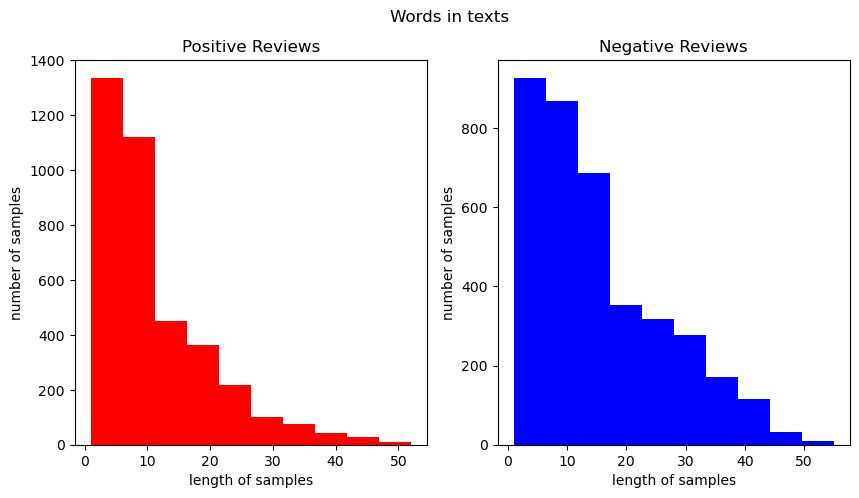

In [344]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['lable']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')                                  # Í∏çÏ†ïÎ∂ÄÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®Ïù¥Îã§. 
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('Í∏çÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :', np.mean(text_len))

text_len = train_data[train_data['lable']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')                                 # Î∂ÄÏ†ïÎ∂ÄÏùò ÌûàÏä§ÌÜ†Í∑∏Îû®Ïù¥Îã§. 
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('Î∂ÄÏ†ï Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :', np.mean(text_len))              # Î∂ÄÏ†ïÎ¶¨Î∑∞Ïùò Í∏∏Ïù¥Îäî ÍΩ§ Í∏¥ ÌäπÏßïÏù¥ ÏûàÎã§. 
plt.show()

In [345]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [346]:
X_train = train_data['tokenized'].values
y_train = train_data['lable'].values
X_test= test_data['tokenized'].values
y_test = test_data['lable'].values

In [347]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [348]:
tokenizer.word_index

{'Ïûò': 1,
 'Î∞∞ÏÜ°': 2,
 'ÎÑàÎ¨¥': 3,
 '..': 4,
 'Ïöî': 5,
 'Ïïà': 6,
 'Ï¢ãÏïÑÏöî': 7,
 'Ïû¨Íµ¨Îß§': 8,
 'Íµ¨Îß§': 9,
 '~': 10,
 '...': 11,
 'ÏúºÎ°ú': 12,
 'ÏÇ¨Ïö©': 13,
 'Í∑∏ÎÉ•': 14,
 'Î°ú': 15,
 'Ï†úÌíà': 16,
 'ÌñàÎäîÎç∞': 17,
 'Î≥¥Îã§': 18,
 'Í∞ÄÍ≤©': 19,
 'ÌïòÍ≥†': 20,
 'ÏÉùÍ∞Å': 21,
 'Ï¢Ä': 22,
 'Í∞ôÏïÑÏöî': 23,
 'Ï£ºÎ¨∏': 24,
 'ÏûÖÎãàÎã§': 25,
 ',': 26,
 'Îßõ': 27,
 '!': 28,
 'Î™ª': 29,
 'Îïå': 30,
 'ÎßéÏù¥': 31,
 'Îßå': 32,
 'Ìï¥ÏÑú': 33,
 'Îçî': 34,
 'Î≥ÑÎ°ú': 35,
 'Í≤É': 36,
 'Í∞ú': 37,
 'Ìï©ÎãàÎã§': 38,
 'ÏÇ¨Ïù¥Ï¶à': 39,
 '„Ö†„Ö†': 40,
 'ÏóêÏÑú': 41,
 'ÏÑú': 42,
 'Í±∞': 43,
 'ÏÉÅÌíà': 44,
 'Ìè¨Ïû•': 45,
 'Îã§Î•∏': 46,
 'Ï¢ãÎÑ§Ïöî': 47,
 'ÎÉÑÏÉà': 48,
 '?': 49,
 '„Ö†': 50,
 'Ï†ïÎßê': 51,
 'ÌïòÎÇò': 52,
 '^^': 53,
 'ÌñàÏñ¥Ïöî': 54,
 'Î∂ÄÎ∂Ñ': 55,
 'ÏßÑÏßú': 56,
 'Îπ†Î•¥Í≥†': 57,
 'Ï°∞Í∏à': 58,
 'Ìï†': 59,
 '~~': 60,
 'Ï†ú': 61,
 'ÎÇò': 62,
 'ÎÑò': 63,
 'ÏÉÄÎäîÎç∞': 64,
 'Ï†Ä': 65,
 'Ïù∏Îç∞': 66,
 'Ïù¥Îùº': 67,
 'Íµ¨ÏûÖ': 68,
 'Ï¢ãÏäµÎãàÎã§': 69,
 'Ï¢ãÏùÄ': 70,
 'Î∞òÌíà': 71,


In [349]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ :',total_cnt)
print('Îì±Ïû• ÎπàÎèÑÍ∞Ä %sÎ≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: %s'%(threshold - 1, rare_cnt))
print("Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®:", (rare_cnt / total_cnt)*100)
print("Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®:", (rare_freq / total_freq)*100)

Îã®Ïñ¥ ÏßëÌï©(vocabulary)Ïùò ÌÅ¨Í∏∞ : 17395
Îì±Ïû• ÎπàÎèÑÍ∞Ä 1Î≤à Ïù¥ÌïòÏù∏ Ìù¨Í∑Ä Îã®Ïñ¥Ïùò Ïàò: 10386
Îã®Ïñ¥ ÏßëÌï©ÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥Ïùò ÎπÑÏú®: 59.70681230238575
Ï†ÑÏ≤¥ Îì±Ïû• ÎπàÎèÑÏóêÏÑú Ìù¨Í∑Ä Îã®Ïñ¥ Îì±Ïû• ÎπàÎèÑ ÎπÑÏú®: 10.313598538261406


In [350]:
vocab_size = total_cnt - rare_cnt + 2          # 2Î•º ÎçîÌïú Ïù¥Ïú†Îäî 0Ïù¥ÎùºÎäî Ìå®Îî©ÌÜ†ÌÅ∞Ïóê OOV ÌÜ†ÌÅ∞ ÌïòÎÇòÍ∞Ä Îçî Ï∂îÍ∞ÄÎêòÏóàÍ∏∞ ÎïåÎ¨∏Ïù¥Îã§
print('Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ :',vocab_size)

Îã®Ïñ¥ ÏßëÌï©Ïùò ÌÅ¨Í∏∞ : 7011


In [351]:
# ÏòàÎ•º Îì§Ïñ¥ 'ÎÇòÎäî Ïò§Îäò ÌïôÍµêÏóê Í∞îÏäµÎãàÎã§.'' ÎùºÎäî Îã®Ïñ¥Í∞Ä ÏûàÎã§Í≥† ÌïòÏûê.
# Í∑∏Îü∞Îç∞ ÏÇ¨Ï†ÑÏóê 'Ïò§Îäò'Ïù¥ÎùºÎäî Îã®Ïñ¥Í∞Ä ÏÇ¨Ï†ÑÏóê ÏóÜÎã§Í≥† Ìï¥Î≥¥Ïûê. 
# Í∑∏Î†áÎã§Î©¥ ÏÇ¨Ï†ÑÏóê ÏóÜÎäî Îã®Ïñ¥Í∞Ä Ï∂úÌòÑÌïòÎ©¥ OOVÏóê Îã¥ÏïÑÎ≤ÑÎ¶¨Îäî Í≤ÉÏù¥Îã§. 
# Ï¶â threshholdÏùò Í∞íÏóê Îî∞Îùº Îã§Î•¥Îã§. 
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# Î¨∏Ï†úÎäî ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞Ïóê OOVÍ∞Ä Îçî ÎßéÏùÑ Í∞ÄÎä•ÏÑ±Ïù¥ ÏûàÎã§. 
# Í∑∏ÎûòÎèÑ ÌÖåÏä§Ìä∏Îç∞Ïù¥ÌÑ∞Ïóê Ï°¥Ïû¨ÌïòÏßÄ ÏïäÎçîÎùºÎèÑ ÌõàÎ†®ÏùÑ ÏúÑÌï¥ÏÑúÎäî ÌõàÎ†®Îç∞Ïù¥ÌÑ∞Îßå Ïì∞Îäî Í≤ÉÏù¥Îã§. 
# Ïã†Ï°∞Ïñ¥ÎÇò ÏùÄÏñ¥Îäî OOVÍ∞Ä ÎÇòÏò¨ Í≤ÉÏù¥Îã§. 

In [352]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [353]:
tokenizer.word_index # OOVÍ∞Ä Í∞ÄÏû• ÎßéÏù¥ ÎÇòÏò®Îã§Îäî ÎúªÏù¥Îã§. 

{'OOV': 1,
 'Ïûò': 2,
 'Î∞∞ÏÜ°': 3,
 'ÎÑàÎ¨¥': 4,
 '..': 5,
 'Ïöî': 6,
 'Ïïà': 7,
 'Ï¢ãÏïÑÏöî': 8,
 'Ïû¨Íµ¨Îß§': 9,
 'Íµ¨Îß§': 10,
 '~': 11,
 '...': 12,
 'ÏúºÎ°ú': 13,
 'ÏÇ¨Ïö©': 14,
 'Í∑∏ÎÉ•': 15,
 'Î°ú': 16,
 'Ï†úÌíà': 17,
 'ÌñàÎäîÎç∞': 18,
 'Î≥¥Îã§': 19,
 'Í∞ÄÍ≤©': 20,
 'ÌïòÍ≥†': 21,
 'ÏÉùÍ∞Å': 22,
 'Ï¢Ä': 23,
 'Í∞ôÏïÑÏöî': 24,
 'Ï£ºÎ¨∏': 25,
 'ÏûÖÎãàÎã§': 26,
 ',': 27,
 'Îßõ': 28,
 '!': 29,
 'Î™ª': 30,
 'Îïå': 31,
 'ÎßéÏù¥': 32,
 'Îßå': 33,
 'Ìï¥ÏÑú': 34,
 'Îçî': 35,
 'Î≥ÑÎ°ú': 36,
 'Í≤É': 37,
 'Í∞ú': 38,
 'Ìï©ÎãàÎã§': 39,
 'ÏÇ¨Ïù¥Ï¶à': 40,
 '„Ö†„Ö†': 41,
 'ÏóêÏÑú': 42,
 'ÏÑú': 43,
 'Í±∞': 44,
 'ÏÉÅÌíà': 45,
 'Ìè¨Ïû•': 46,
 'Îã§Î•∏': 47,
 'Ï¢ãÎÑ§Ïöî': 48,
 'ÎÉÑÏÉà': 49,
 '?': 50,
 '„Ö†': 51,
 'Ï†ïÎßê': 52,
 'ÌïòÎÇò': 53,
 '^^': 54,
 'ÌñàÏñ¥Ïöî': 55,
 'Î∂ÄÎ∂Ñ': 56,
 'ÏßÑÏßú': 57,
 'Îπ†Î•¥Í≥†': 58,
 'Ï°∞Í∏à': 59,
 'Ìï†': 60,
 '~~': 61,
 'Ï†ú': 62,
 'ÎÇò': 63,
 'ÎÑò': 64,
 'ÏÉÄÎäîÎç∞': 65,
 'Ï†Ä': 66,
 'Ïù∏Îç∞': 67,
 'Ïù¥Îùº': 68,
 'Íµ¨ÏûÖ': 69,
 'Ï¢ãÏäµÎãàÎã§': 70,
 'Ï¢ãÏùÄ': 71,
 'Î

In [354]:
print(tokenizer.word_index)

{'OOV': 1, 'Ïûò': 2, 'Î∞∞ÏÜ°': 3, 'ÎÑàÎ¨¥': 4, '..': 5, 'Ïöî': 6, 'Ïïà': 7, 'Ï¢ãÏïÑÏöî': 8, 'Ïû¨Íµ¨Îß§': 9, 'Íµ¨Îß§': 10, '~': 11, '...': 12, 'ÏúºÎ°ú': 13, 'ÏÇ¨Ïö©': 14, 'Í∑∏ÎÉ•': 15, 'Î°ú': 16, 'Ï†úÌíà': 17, 'ÌñàÎäîÎç∞': 18, 'Î≥¥Îã§': 19, 'Í∞ÄÍ≤©': 20, 'ÌïòÍ≥†': 21, 'ÏÉùÍ∞Å': 22, 'Ï¢Ä': 23, 'Í∞ôÏïÑÏöî': 24, 'Ï£ºÎ¨∏': 25, 'ÏûÖÎãàÎã§': 26, ',': 27, 'Îßõ': 28, '!': 29, 'Î™ª': 30, 'Îïå': 31, 'ÎßéÏù¥': 32, 'Îßå': 33, 'Ìï¥ÏÑú': 34, 'Îçî': 35, 'Î≥ÑÎ°ú': 36, 'Í≤É': 37, 'Í∞ú': 38, 'Ìï©ÎãàÎã§': 39, 'ÏÇ¨Ïù¥Ï¶à': 40, '„Ö†„Ö†': 41, 'ÏóêÏÑú': 42, 'ÏÑú': 43, 'Í±∞': 44, 'ÏÉÅÌíà': 45, 'Ìè¨Ïû•': 46, 'Îã§Î•∏': 47, 'Ï¢ãÎÑ§Ïöî': 48, 'ÎÉÑÏÉà': 49, '?': 50, '„Ö†': 51, 'Ï†ïÎßê': 52, 'ÌïòÎÇò': 53, '^^': 54, 'ÌñàÏñ¥Ïöî': 55, 'Î∂ÄÎ∂Ñ': 56, 'ÏßÑÏßú': 57, 'Îπ†Î•¥Í≥†': 58, 'Ï°∞Í∏à': 59, 'Ìï†': 60, '~~': 61, 'Ï†ú': 62, 'ÎÇò': 63, 'ÎÑò': 64, 'ÏÉÄÎäîÎç∞': 65, 'Ï†Ä': 66, 'Ïù∏Îç∞': 67, 'Ïù¥Îùº': 68, 'Íµ¨ÏûÖ': 69, 'Ï¢ãÏäµÎãàÎã§': 70, 'Ï¢ãÏùÄ': 71, 'Î∞òÌíà': 72, 'Îòê': 73, 'ÏÇ¨ÏßÑ': 74, 'Îëê': 75, 'Ï†ïÎèÑ': 76, 'Ìï¥': 77

Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ : 55
Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ : 13.426933333333332


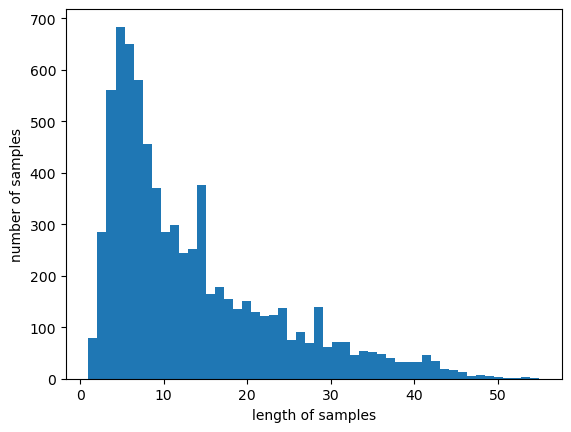

In [355]:
print('Î¶¨Î∑∞Ïùò ÏµúÎåÄ Í∏∏Ïù¥ :',max(len(l) for l in X_train))
print('Î¶¨Î∑∞Ïùò ÌèâÍ∑† Í∏∏Ïù¥ :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [356]:
X_train = pad_sequences(X_train, maxlen = 55)  # ÌÉÄÏûÑÏä§ÌÖùÏù¥ 55Ïù¥Îã§. 
X_test = pad_sequences(X_test, maxlen = 55)     # ÏûÑÎ≤†Îî©ÏùÑ ÏúÑÌï¥ÏÑú Ìå®Îî©ÏùÑ ÌïúÎã§. 

In [357]:
# 100Ï∞®ÏõêÏúºÎ°ú ÏûÑÎ≤†Îî©ÏùÑ ÌïúÎã§Ïùå lstmÏÖÄÏóê Ìà¨ÏûÖÌï† Í≤ÉÏù¥Îã§. Ïù¥ÌõÑ Îç¥Ïä§Î°ú Í≤∞Í≥ºÎ•º Ï∂úÎ†•ÌïúÎã§.
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [358]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [359]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [360]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5778 - acc: 0.6942
Epoch 1: val_acc improved from -inf to 0.82400, saving model to best_model.h5
100/100 [==============================] - 6s 46ms/step - loss: 0.5778 - acc: 0.6942 - val_loss: 0.4246 - val_acc: 0.8240
Epoch 2/15
  3/100 [..............................] - ETA: 3s - loss: 0.3803 - acc: 0.8667

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 0.3350 - acc: 0.8729
Epoch 2: val_acc improved from 0.82400 to 0.84867, saving model to best_model.h5
100/100 [==============================] - 4s 38ms/step - loss: 0.3352 - acc: 0.8728 - val_loss: 0.3573 - val_acc: 0.8487
Epoch 3/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2485 - acc: 0.9135
Epoch 3: val_acc improved from 0.84867 to 0.86400, saving model to best_model.h5
100/100 [==============================] - 4s 37ms/step - loss: 0.2488 - acc: 0.9130 - val_loss: 0.3486 - val_acc: 0.8640
Epoch 4/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1949 - acc: 0.9333
Epoch 4: val_acc did not improve from 0.86400
100/100 [==============================] - 4s 37ms/step - loss: 0.1952 - acc: 0.9330 - val_loss: 0.3559 - val_acc: 0.8620
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1612 - acc: 0.9473
Epoch 5: val_acc did not improve from 0.86400
100/100 [==================

In [361]:
loaded_model = load_model('best_model.h5')

In [362]:
loaded_model.evaluate(X_test, y_test) # ÍΩ§ Ï†ïÌôïÎèÑÍ∞Ä Í¥úÏ∞ÆÎã§. 

79/79 [==============================] - 1s 13ms/step - loss: 0.3548 - acc: 0.8624


[0.3548256754875183, 0.8623999953269958]

In [363]:
# Î¨∏Ï†ú. Ïù¥ Ï†úÌíàÏùÄ ÎÑàÎ¨¥ Ï¢ãÏùÄÎç∞Ïöî. Ï†ïÎßê Ï¢ãÏïÑÏöî. Í∞ïÏ∂îÌï©ÎãàÎã§. Ïù¥Îü∞ ÎåìÍ∏ÄÏùÑ ÏûÖÎ†•ÌñàÏùÑÎïå Í∏çÏ†ïÏù∏ÏßÄ Î∂ÄÏ†ïÏù∏ÏßÄ Ï∂úÎ†•ÌïòÎäî Í≤ÉÏùÑ ÎßåÎì§Ïñ¥Îùº.
# Ïù¥Í≤ÉÎèÑ ÏÉÅÌíàÏù∏Í∞ÄÏöî? Ï†ïÎßê ÌôîÍ∞Ä ÎÇ©ÎãàÎã§. Î∂ÑÎÖ∏Í∞Ä ÏπòÎ∞ÄÏñ¥Ïöî. Í∞úÏßúÏ¶ùÎÇ©ÎãàÎã§.
# Ìï®ÏàòÎ•º ÎßåÎì§Ïñ¥ÏÑú Ïñ∏Ïñ¥Î•º Ï†ÑÎã¨Î∞õÏïÑÏÑú Î¶¨ÌÑ¥Í≤∞Í≥ºÍ∞Ä Í∏çÏ†ïÏù∏ÏßÄ Î∂ÄÏ†ïÏù∏ÏßÄ Ï∂úÎ†•ÌïòÎùº. 

In [ ]:
# YOLO
# ÏùºÏ¢ÖÏùò Î™®Îç∏Ïù¥Îã§. Í∞ùÏ≤¥Î•º Í∞êÏßÄ / Ï∂îÏ∂úÌïòÎäî Í≤ÉÏù¥ Ï£º Î™©Ï†ÅÏù¥Îã§. 
# Ïù¥ÎØ∏ ÏÇ¨Ï†ÑÏóê ÌïôÏäµÏù¥ ÎêòÏñ¥Ï†∏ ÏûàÎäî Î™®Îç∏Ïù¥Îã§. 
# Ïù¥Í±∏ Ïù¥Ïö©ÌïúÎã§Îäî Í≤ÉÏùÄ Ïù¥ÎØ∏ ÌïôÏäµÎêòÏñ¥Ï†∏ÏûàÎäî Î™®Îç∏Î°ú Î∂ÑÎ•òÌïúÎã§Îäî Í≤ÉÏù¥Îã§. 
# ÏÇ¨ÎûåÏù∏ÏßÄ ÏùòÏûêÏù∏ÏßÄ Î∂ÑÎ•òÌï† Ïàò ÏûàÎã§Îäî Í≤ÉÏù¥Îã§. 
# Î¨ºÎ°† ÏÇ¨ÎûåÏùÑ ÏãùÎ≥ÑÌïúÎã§Îäî Í≤É ÎøêÏù¥ÏßÄ ÎàÑÍµ∞ÏßÄÎäî Î™®Î•∏Îã§. 
# ÌååÏù∏ÌäúÎãùÏùÑ Ïù¥Ïö©ÌïòÏó¨ Ï∂îÍ∞ÄÌïôÏäµÏùÑ ÌïòÎäî Í≤ÉÏù¥Îã§. 
# 
# ÏàúÏÑúÎäî Îã§ÏùåÍ≥º Í∞ôÎã§.
# 1. Ïù¥ÎØ∏ÏßÄÎ•º ÎÑ§Î™®Î°ú Î¨∂Í≥† Ïù¥ ÏÇ¨ÎûåÏùÄ ÎàÑÍµ¨ÎùºÍ≥† ÏïåÎ†§Ï£ºÎäî Í≤ÉÏù¥Îã§. Ïù¥Í≤ÉÏù¥ AI ÎÖ∏Í∞ÄÎã§Ïù¥Îã§. 
# 2. Ïù¥Îü¨Ìïú ÏÇ¨ÏßÑÏùÑ Ïó¨Îü¨ Í∞ÄÏßÄÎ•º Ï§ÄÎπÑÌïòÎäî Í≤ÉÏù¥Îã§. Í∑∏Îü¨Î©¥ ÏÇ¨ÏßÑÏúºÎ°ú ÎàÑÍµ¨Ïù∏ÏßÄ Î∞îÎ°ú ÏïåÏïÑÎ≥º Ïàò ÏûàÎã§. 
# 3. Ïã§ÏãúÍ∞Ñ ÏòÅÏÉÅÏóêÏÑúÎèÑ Ïù¥ ÏÇ¨ÎûåÎì§Ïù¥ ÎàÑÍµ¨Ïù∏ÏßÄ Ïïå Ïàò ÏûàÏùÑ Í≤ÉÏù¥Îã§. 
# 4. Ïπ¥Î©îÎùº ÏòÅÏÉÅÏóêÏÑú Ï∞æÎäî Í≤ÉÏù¥ Í∞ÄÎä•Ìï¥Ïßà Í≤ÉÏù¥Îã§. ÏûëÏóÖÏù¥ Í∑∏Î†áÍ≤å ÎÇòÎà†ÏßÑÎã§.
# 5. Ïù¥Í≤ÉÏù¥ ÌååÏù∏ÌäúÎãùÏù¥Îã§. ÎØ∏ÏÑ∏Ï°∞Ï†ïÏù∏ Í≤ÉÏù¥Îã§. 